# Standing on the Feet of Giants - State of the Art in Reproducibility
New analyses for the AI Magazine special issue on resources. 

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data
df = pd.read_csv('data/evaluation.csv', sep=';',index_col = 'index')
#df.head()
#df.columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 27 columns):
title                     400 non-null object
research_type             400 non-null object
result_outcome            400 non-null int64
affiliation               400 non-null int64
problem_description       400 non-null int64
goal/objective            400 non-null int64
research_method           400 non-null int64
research_question         400 non-null int64
hypothesis                400 non-null int64
prediction                400 non-null int64
contribution              400 non-null int64
pseudocode                325 non-null float64
open_source_code          325 non-null float64
open_experiment_code      325 non-null float64
train                     185 non-null float64
validation                182 non-null float64
test                      325 non-null float64
results                   325 non-null float64
hardware_specification    325 non-null float64
software_dependencies 

In [4]:
#df.index
df.shape


(400, 27)

In [5]:
#iterate through all rows and compute r3, r2d, r2i and r1

#Lists to store reproducibility degree metrics in
m=[]
d=[]
e=[]
r1=[]
r2=[]
r3=[]


#Calculate metric for method
def method(row):
    pd = row['problem_description']
    go = row['goal/objective']
    rm = row['research_method']
    rq = row['research_question']
    pc = row['pseudocode']
    hyp = row['hypothesis']
    pred = row['prediction']       
    es = row['experiment_setup']

    if np.isnan(es):
        es = 0
                   
    if np.isnan(pc):
        pc = 0
    
    if np.isnan(hyp):
        hyp = 0
    
    if np.isnan(pred):
        pred = 0
        
    return (pd+go+rm+rq+pc+hyp+pred+es)/8

#Calculate metric for data
def data(row):
    res = row['results']
    if np.isnan(res):
        res = 0.0
        
    train = row['train']
    if np.isnan(train):
        train = 0.0
    
    val = row['validation']
    if np.isnan(val):
        val = 0.0
        
    test = row['test']   
    if np.isnan(test):
        test = 0.0

    return (res+train+val+test)/4        
  

#Calculate metric for experiment
def experiment(row):
   
    osc = row['open_source_code']
    if np.isnan(osc):
        osc = 0
        
    oec = row['open_experiment_code']
    if np.isnan(oec):
        oec = 0
        
    hs = row['hardware_specification']
    if np.isnan(hs):
        hs = 0
        
    sd = row['software_dependencies']
    if np.isnan(sd):
        sd = 0
    
    return (osc+oec+hs+sd)/4


#Iterate over all papers in dataframe
for index, row in df.iterrows():
    #print(row['research_type'])
    
    #If research type is theoretical, then we do not calculate the metrics
    if row['research_type'] == 'T':
        m.append(-1)
        d.append(-1)
        e.append(-1)
        r3.append(-1)
        r2.append(-1)
        r1.append(-1)
        continue
    
    #If the paper reports empirical research, we compute the metrics
    #Calculate metrics for method
    rm = method(row)
    m.append(rm)
    
    #Calculate metrics for data
    rd = data(row)
    d.append(rd)
    
    #Calculate metrics for experiment
    re = experiment(row)
    e.append(re)
    
    #Compute the reproducibility degree metrics
    rr3 = rm
    r3.append(rr3)

    rr2 = (rm+rd)/2
    r2.append(rr2)
    
    rr1 = (rm+rd+re)/3
    r1.append(rr1)

#Add new columns to the data frame
df['method'] = m
df['data'] = d
df['experiment']=e
df['R3'] = r3
df['R2'] = r2
df['R1'] = r1

#df.head()

0    23
Name: result_outcome, dtype: int64
1    377
0     23
Name: result_outcome, dtype: int64


research_type  result_outcome
E              1                 314
               0                  11
T              1                  63
               0                  12
Name: result_outcome, dtype: int64

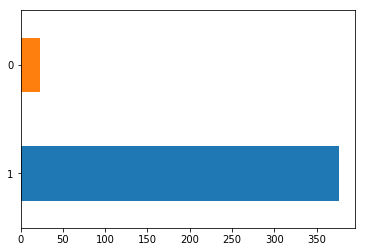

In [6]:
#Of all the surveyed papers, how many have positive results?
pos_outcomes = df[df['result_outcome']==0]['result_outcome'].value_counts() #23
print(pos_outcomes)# Sigbjørn kommenterte at han ikke tolket negative outcome slik som jeg => Se over masteroppgaven og vurdere om dette er gyldig resultat

#Of all the surveyed papers, what are the outcomes?
outcomes = df['result_outcome'].value_counts()
print(outcomes)

outcomes.plot(kind='barh', rot=0)

#Group outcomes by research types.
df.groupby('research_type')['result_outcome'].value_counts()



E    325
T     75
Name: research_type, dtype: int64
###### MEAN ######
All papers
R1: 0.19538461538461524
R2: 0.22192307692307692
R3: 0.2569230769230769
###### MEDIAN ######
All papers
R1: 0.16666666666666666
R2: 0.1875
R3: 0.25


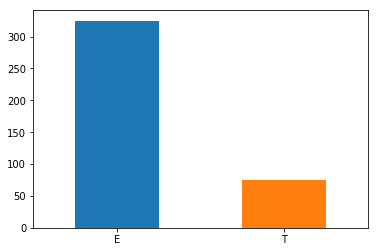

In [7]:
#Make dataframes for each type of paper (theoretical and experimental)
theoretical = df[df['research_type'] == 'T']
experimental = df[df['research_type'] == 'E']


type_count = df['research_type'].value_counts()
print(type_count)
type_count.plot(kind='bar', rot=1)

# Goal: Make spider plot for all papers, later to compare with spider plots for academic, collaborations and industry
test_experimental = df.groupby('research_type')

#Boxplot showing descriptive statistics for R1, R2 and R3 for all experimental papers
#df.groupby('research_type').boxplot(column=['R1','R2', 'R3'],  grid=False)

print ('###### MEAN ######')
print ('All papers')

#print("Group by:" +str(df.groupby('research_type')['R1'].mean()['E']))

print('R1: ' +str(df.groupby('research_type')['R1'].mean()['E']))
print('R2: ' +str(df.groupby('research_type')['R2'].mean()['E']))
print('R3: ' +str(df.groupby('research_type')['R3'].mean()['E']))

print ('###### MEDIAN ######')
print ('All papers')
print('R1: ' +str(df.groupby('research_type')['R1'].median()['E']))
print('R2: ' +str(df.groupby('research_type')['R2'].median()['E']))
print('R3: ' +str(df.groupby('research_type')['R3'].median()['E']))

#test_experimental.head()



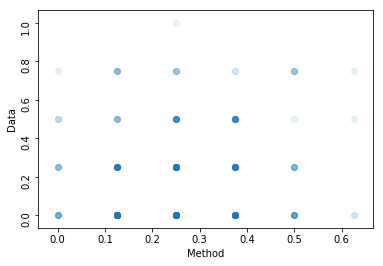

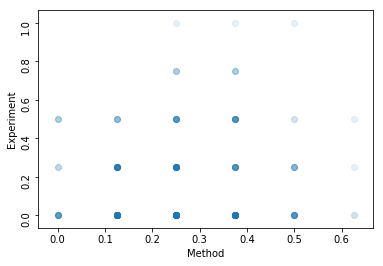

In [8]:
#SCATTER PLOT: Method against data
plt.scatter(experimental.method, experimental.data, alpha=0.1)
plt.xlabel('Method')
plt.ylabel('Data')
plt.yticks(rotation=90)
plt.show()

#SCATTER PLOT: Method against experiment
plt.scatter(experimental.method, experimental.experiment, alpha=0.1)
plt.xlabel('Method')
plt.ylabel('Experiment')
plt.yticks(rotation=90)
plt.show()

In [9]:
#Descriptive statistics for the different affiliations academic, industrial and collaborative (mix of industry and academic)
academic = experimental[experimental['affiliation']==0]
print('Academic papers:' +str(len(academic.index)))

collaboration = experimental[experimental['affiliation']==1]
print('Collaboration papers:' +str(len(collaboration.index)))

industry = experimental[experimental['affiliation']==2]
print('Industry papers:' +str(len(industry.index)))

joint = collaboration.copy()
joint = joint.append(industry)
print('Joint (collab + industry):' +str(len(joint.index)))

Academic papers:268
Collaboration papers:47
Industry papers:10
Joint (collab + industry):57


In [10]:
print("Count of R1 scores:")
print(experimental.R1.value_counts())

print("Count of R2 scores:")
print(experimental.R2.value_counts())

print("Count of R3 scores:")
print(experimental.R3.value_counts())

Count of R1 scores:
0.125000    47
0.166667    47
0.083333    44
0.208333    36
0.041667    35
0.250000    33
0.291667    29
0.333333    17
0.375000    10
0.416667     7
0.000000     5
0.458333     4
0.541667     4
0.583333     3
0.500000     2
0.625000     1
0.750000     1
Name: R1, dtype: int64
Count of R2 scores:
0.1250    66
0.1875    62
0.2500    50
0.0625    48
0.3125    30
0.3750    23
0.4375    22
0.0000     8
0.6250     6
0.5000     6
0.5625     3
0.6875     1
Name: R2, dtype: int64
Count of R3 scores:
0.250    118
0.125     83
0.375     79
0.500     23
0.000     18
0.625      4
Name: R3, dtype: int64


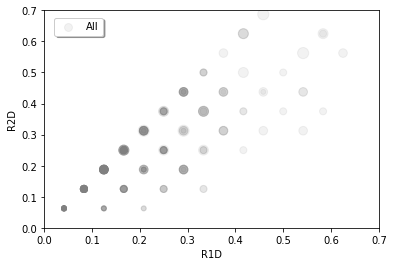

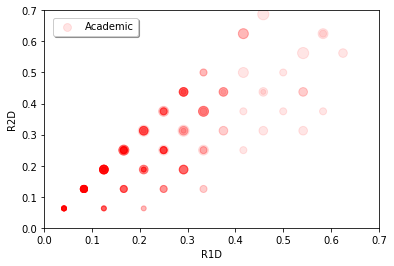

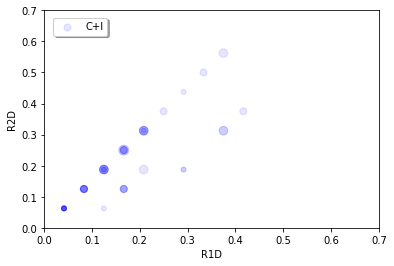

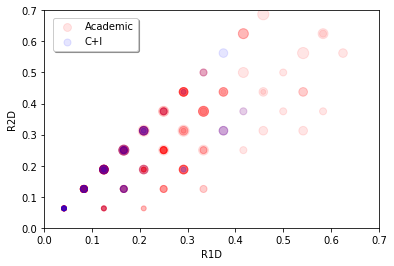

In [11]:
#SCATTER PLOT: R1D against R2D against R3D

# All
f = plt.figure()
plt.scatter(experimental.R1, experimental.R2, s=experimental.R3*200,  alpha=0.1, color='grey')
plt.xlim(0.0, 0.7)
plt.ylim(0.0, 0.7)
plt.xlabel('R1D')
plt.ylabel('R2D')
f.legend(labels=['All',''],bbox_to_anchor=(0.25,0.88), shadow=True)
f.savefig("scatter_all.pdf", bbox_inches='tight',transparent=True)
plt.show()

# Academic
f = plt.figure()
plt.scatter(academic.R1, academic.R2, s=academic.R3*200,  alpha=0.1, color='red') #orangered
plt.xlim(0.0, 0.7)
plt.ylim(0.0, 0.7)
plt.xlabel('R1D')
plt.ylabel('R2D')
f.legend(labels=['Academic', ''],bbox_to_anchor=(0.33,0.88), shadow=True)
f.savefig("scatter-academic.pdf", bbox_inches='tight',transparent=True)
plt.show()

# Joint
f = plt.figure()
plt.scatter(joint.R1, joint.R2, s=joint.R3*200,  alpha=0.1, color='blue') #powderblue
plt.xlim(0.0, 0.7) 
plt.ylim(0.0, 0.7)
plt.xlabel('R1D')
plt.ylabel('R2D')
f.legend(labels=['C+I',''],bbox_to_anchor=(0.26,0.88), shadow=True)
f.savefig("scatter-joint.pdf", bbox_inches='tight',transparent=True)
plt.show()

#SCATTER PLOT: R1 against R2 against R3
f = plt.figure()
plt.scatter(academic.R1, academic.R2, s=academic.R3*200,  alpha=0.1, color='red')
plt.scatter(joint.R1, joint.R2, s=joint.R3*200,  alpha=0.1, color='blue')
plt.xlim(0.0, 0.7)
plt.ylim(0.0, 0.7)
plt.xlabel('R1D')
plt.ylabel('R2D')
f.legend(labels=['Academic','C+I'],bbox_to_anchor=(0.33,0.88), shadow=True)
f.savefig("scatter-academic_joint.pdf", bbox_inches='tight',transparent=True)
plt.show()

#experimental.sort_values(by=['R3'])

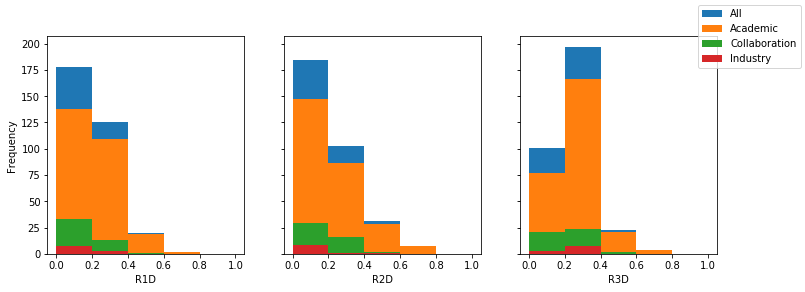

In [12]:
#Sammenligning av reproduserbarmål for alle, academic collaboration og industri
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(12,4))
fig.subplots_adjust(hspace=0.2,wspace=0.2)

# R1
ax1.set_xlabel('R1D')
experimental.R1.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax1)
academic.R1.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax1)
collaboration.R1.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax1)
industry.R1.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax1)
#plt.axis([0,1.0,0,170])
#plt.show()

# R2
ax2.set_xlabel('R2D')
experimental.R2.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax2)
academic.R2.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax2)
collaboration.R2.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax2)
industry.R2.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax2)
#plt.axis([0,1.0,0,170])
#plt.xlabel('R1')
#plt.show()

# R3
#plt.subplot(1,3,3,sharey='row')
ax3.set_xlabel('R3D')
experimental.R3.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax3)
academic.R3.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax3)
collaboration.R3.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax3)
industry.R3.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax3)
#plt.axis([0,1.0,0,170])

fig.legend(['All', 'Academic','Collaboration','Industry'])
plt.show()

#industry

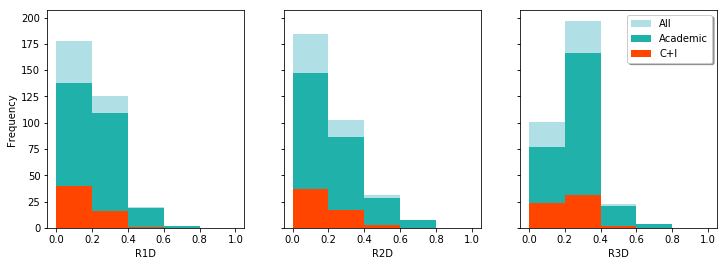

In [13]:
#Sammenligning av reproduserbarmål for alle, academic og joint 

fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(12,4))
fig.subplots_adjust(hspace=0.2,wspace=0.2)


#R1
ax1.set_xlabel('R1D')
experimental.R1.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax1, color ='powderblue')
academic.R1.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax1, color ='lightseagreen')
joint.R1.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax1, color ='orangered')
#plt.axis([0,1.0,0,140])
plt.xlabel('R1D')
#plt.show() powderblue lightseagreen orangered

#R2
ax2.set_xlabel('R2D')
experimental.R2.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax2, color ='powderblue')
academic.R2.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax2, color ='lightseagreen')
joint.R2.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax2, color ='orangered')
#plt.axis([0,1.0,0,140])
plt.xlabel('R2D')

#R3
ax3.set_xlabel('R3D')
experimental.R3.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax3, color ='powderblue')
academic.R3.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax3, color ='lightseagreen')
joint.R3.plot(kind='hist', bins=np.arange(0,1.1,0.2), ax = ax3, color ='orangered')
#plt.axis([0,1.0,0,150])
plt.xlabel('R3D')

#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2, labels=['All', 'Academic','C+I'])
fig.legend(labels=['All', 'Academic','C+I'], bbox_to_anchor=(0.83,0.89), shadow=True)
fig.savefig("barchart-R1-3.pdf", bbox_inches='tight',transparent=True)
plt.show()

#joint

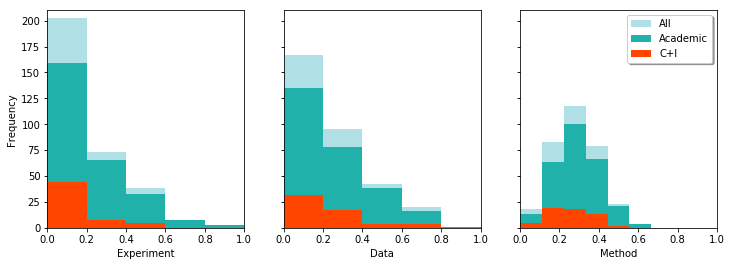

In [14]:
#Sammenligning av data for alle, academic og joint 

fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(12,4))
fig.subplots_adjust(hspace=0.2,wspace=0.2)

# Experiment
ax1.set_xlabel('Experiment')
experimental.experiment.plot(kind='hist', bins=np.arange(0,(1+1/5),1/5), ax = ax1, color ='powderblue')
academic.experiment.plot(kind='hist', bins=np.arange(0,(1+1/5),1/5), ax = ax1, color ='lightseagreen')
joint.experiment.plot(kind='hist', bins=np.arange(0,(1+1/5),1/5), ax = ax1, color ='orangered')
ax1.axis([0,1.0,0,210]) #Ticks 0.25,0.5 ...
#plt.show()

# Data
ax2.set_xlabel('Data')
experimental.data.plot(kind='hist', bins=np.arange(0,(1+1/5),1/5), ax = ax2, color ='powderblue')
academic.data.plot(kind='hist', bins=np.arange(0,(1+1/5),1/5), ax = ax2, color ='lightseagreen')
joint.data.plot(kind='hist', bins=np.arange(0,(1+1/5),1/5), ax = ax2, color ='orangered')
ax2.axis([0,1.0,0,210]) #Ticks 0.25,0.5 ...
#plt.show()

# Method
ax3.set_xlabel('Method')
experimental.method.plot(kind='hist', bins=np.arange(0,(1+1/9),1/9), ax = ax3, color ='powderblue')
academic.method.plot(kind='hist', bins=np.arange(0,(1+1/9),1/9), ax = ax3, color ='lightseagreen')
joint.method.plot(kind='hist', bins=np.arange(0,(1+1/9),1/9), ax = ax3, color ='orangered')
ax3.axis([0,1.0,0,210]) #Ticks 0.25,0.5 ...
#plt.show()

fig.legend(labels=['All', 'Academic','C+I'], bbox_to_anchor=(0.83,0.89), shadow=True)
fig.savefig("barchart-exp-data-method.pdf", bbox_inches='tight',transparent=True)
plt.show()




In [15]:

list_of_series = [experimental.data, academic.data]
index = ['all', 'ac']
dfr = pd.DataFrame(list_of_series)#, columns=index)



data_all= pd.DataFrame(experimental.data)#, columns=['all'])
data_ac= academic['data']


data_collab=collaboration['data']
data_ind=industry['data']
data_joint=joint['data']




#dfr['collab'] = data_collab
#dfr['ind'] = industry.data
#dfr['ac'] = academic.data

#dfr['R2'] = experimental['R2']
#dfr['R3'] = experimental['R3']

#dfr[] = experimental['R1']

#ax = dfr.plot.hist(experimental.data, bins=4, alpha = 0.3)

#dfr.info()
#data_all.info()
dfr.head()
#data_all.head()
#experimental['R3']
#experimental['data']
#experimental.data.info()
#list_of_series

index,1,3,4,5,6,7,8,9,10,11,...,389,390,391,392,393,394,395,396,397,400
data,0.5,0.25,0.5,0.25,0.0,0.75,0.0,0.0,0.25,0.75,...,0.25,0.25,0.25,0.5,0.5,0.25,0.0,0.25,0.0,0.25
data,0.5,0.25,0.5,0.25,0.0,0.75,0.0,NaN,NaN,0.75,...,0.25,NaN,0.25,0.5,NaN,0.25,0.0,0.25,0.0,0.25


In [16]:
# Generate data for tables and spider charts
from math import sqrt

#Population size for all the types of papers I want to compare
pop_all = len(experimental.index)
pop_ac = len(academic.index)
pop_col = len(collaboration.index)
pop_ind = len(industry.index)
pop_joint = len(joint.index)

print("Total number of papers: " +str(pop_all))
print("# of academic papers: " +str(pop_ac))
print("# of collaboration papers: " +str(pop_col))
print("# of industry papers: " +str(pop_ind))
print("# of collaboration and industry papers combined: " +str(pop_joint))

Total number of papers: 325
# of academic papers: 268
# of collaboration papers: 47
# of industry papers: 10
# of collaboration and industry papers combined: 57


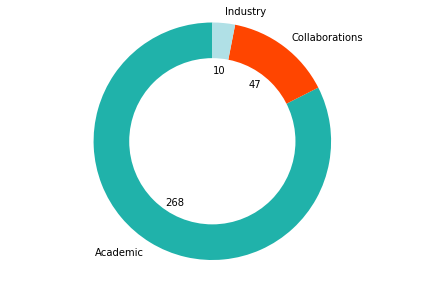

In [17]:
labels = 'Academic', 'Collaborations', 'Industry'
#sizes = [15, 30, 45, 10]

sizes = [pop_ac, pop_col, pop_ind]

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()



# Pie chart
#labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
#sizes = [15, 30, 45, 10]
#colors
colors = ['lightseagreen', 'orangered' ,'powderblue']#,'powderblue']brown
 
fig1, ax1 = plt.subplots()
#ax1.pie(sizes,  labels=labels, colors = colors, autopct='%1.1f%%', startangle=90) 
total = sum(sizes)
ax1.pie(sizes,  labels=labels, colors = colors, autopct=lambda p : '{:.0f}'.format(p * total / 100), startangle=90) 
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
fig.savefig("donut_chart.pdf", bbox_inches='tight',transparent=True)
plt.show()

In [18]:
### ALL ###
print ('All')

#R1
r1 = experimental['R1'].mean()
r1_var = experimental['R1'].var()
r1_err = 1.96*(sqrt(r1_var)/sqrt(pop_all))
print(' -- R1: ' +str(round(r1,2)))
print('    -- error: ' +str(round(r1_err,2)))

#R2
r2 = experimental['R2'].mean()
r2_var = experimental['R2'].var()
r2_err = 1.96*(sqrt(r2_var)/sqrt(pop_all))
print(' -- R2: ' +str(round(r2,2)))
print('    -- error: ' +str(round(r2_err,2)))

#R3
r3 = experimental['R3'].mean()
r3_var = experimental['R3'].var()
r3_err = 1.96*(sqrt(r3_var)/sqrt(pop_all))
print(' -- R3: ' +str(round(r3,2)))
print('    -- error: ' +str(round(r3_err,2)))

### ACADEMIC ###
print ('Academic')

#R1
r1_ac = academic['R1'].mean()
r1_ac_var = academic['R1'].var()
r1_ac_err = 1.96*(sqrt(r1_ac_var)/sqrt(pop_ac))
print(' -- R1: ' +str(round(r1_ac,2)))
print('    -- error: ' +str(round(r1_ac_err,2)))

#R2
r2_ac = academic['R2'].mean()
r2_ac_var = academic['R2'].var()
r2_ac_err = 1.96*(sqrt(r2_ac_var)/sqrt(pop_ac))
print(' -- R2: ' +str(round(r2_ac,2)))
print('    -- error: ' +str(round(r2_ac_err,2)))

#R3
r3_ac = academic['R3'].mean()
r3_ac_var = academic['R3'].var()
r3_ac_err = 1.96*(sqrt(r3_ac_var)/sqrt(pop_ac))
print(' -- R3: ' +str(round(r3_ac,2)))
print('    -- error: ' +str(round(r3_ac_err,2)))


### COLLABORATION ###
print ('Collaboration')

#R1
r1_col = collaboration['R1'].mean()
r1_col_var = collaboration['R1'].var()
r1_col_err = 1.96*(sqrt(r1_col_var)/sqrt(pop_col))
print(' -- R1: ' +str(round(r1_col,2)))
print('    -- error: ' +str(round(r1_col_err,2)))

#R2
r2_col = collaboration['R2'].mean()
r2_col_var = collaboration['R2'].var()
r2_col_err = 1.96*(sqrt(r2_col_var)/sqrt(pop_col))
print(' -- R2: ' +str(round(r2_col,2)))
print('    -- error: ' +str(round(r2_col_err,2)))

#R3
r3_col = collaboration['R3'].mean()
r3_col_var = collaboration['R3'].var()
r3_col_err = 1.96*(sqrt(r3_col_var)/sqrt(pop_col))
print(' -- R3: ' +str(round(r3_col,2)))
print('    -- error: ' +str(round(r3_col_err,2)))

### INDUSTRY ###
print ('Industry')

#R1
r1_ind = industry['R1'].mean()
r1_ind_var = industry['R1'].var()
r1_ind_err = 1.96*(sqrt(r1_ind_var)/sqrt(pop_ind))
print(' -- R1: ' +str(round(r1_ind,2)))
print('    -- error: ' +str(round(r1_ind_err,2)))

#R2
r2_ind = industry['R2'].mean()
r2_ind_var = industry['R2'].var()
r2_ind_err = 1.96*(sqrt(r2_ind_var)/sqrt(pop_ind))
print(' -- R2: ' +str(round(r2_ind,2)))
print('    -- error: ' +str(round(r2_ind_err,2)))

#R3
r3_ind = industry['R3'].mean()
r3_ind_var = industry['R3'].var()
r3_ind_err = 1.96*(sqrt(r3_ind_var)/sqrt(pop_ind))
print(' -- R3: ' +str(round(r3_ind,2)))
print('    -- error: ' +str(round(r3_ind_err,2)))


### JOINT ###
print('C+I')

#R1
r1_joint = joint['R1'].mean()
r1_joint_var = joint['R1'].var()
r1_joint_err = 1.96*(sqrt(r1_joint_var)/sqrt(pop_joint))
print(' -- R1: ' +str(round(r1_joint,2)))
print('    -- error: ' +str(round(r1_joint_err,2)))

#R2
r2_joint = joint['R2'].mean()
r2_joint_var = joint['R2'].var()
r2_joint_err = 1.96*(sqrt(r2_joint_var)/sqrt(pop_joint))
print(' -- R2: ' +str(round(r2_joint,2)))
print('    -- error: ' +str(round(r2_joint_err,2)))

#R3
r3_joint = joint['R3'].mean()
r3_joint_var = joint['R3'].var()
r3_joint_err = 1.96*(sqrt(r3_joint_var)/sqrt(pop_joint))
print(' -- R3: ' +str(round(r3_joint,2)))
print('    -- error: ' +str(round(r3_joint_err,2)))

# Is median interesting in this analysis?
print ('###### MEDIAN ######')

print ('All')
print('R1: ' +str(experimental['R1'].median()))
print('R2: ' +str(experimental['R2'].median()))
print('R3: ' +str(experimental['R3'].median()))

print ('Academic')
print('R1: ' +str(academic['R1'].median()))
print('R2: ' +str(academic['R2'].median()))
print('R3: ' +str(academic['R3'].median()))

print ('Collaboration')
print('R1: ' +str(collaboration['R1'].median()))
print('R2: ' +str(collaboration['R2'].median()))
print('R3: ' +str(collaboration['R3'].median()))

print ('Industry')
print('R1: ' +str(industry['R1'].median()))
print('R2: ' +str(industry['R2'].median())) #Shares less data than academic and collaborations
print('R3: ' +str(industry['R3'].median()))

print ('Joint')
print('R1: ' +str(joint['R1'].median()))
print('R2: ' +str(joint['R2'].median())) #Shares less data than academic and collaborations
print('R3: ' +str(joint['R3'].median()))


All
 -- R1: 0.2
    -- error: 0.01
 -- R2: 0.22
    -- error: 0.01
 -- R3: 0.26
    -- error: 0.01
Academic
 -- R1: 0.2
    -- error: 0.02
 -- R2: 0.23
    -- error: 0.02
 -- R3: 0.26
    -- error: 0.02
Collaboration
 -- R1: 0.15
    -- error: 0.03
 -- R2: 0.2
    -- error: 0.03
 -- R3: 0.22
    -- error: 0.04
Industry
 -- R1: 0.17
    -- error: 0.07
 -- R2: 0.18
    -- error: 0.09
 -- R3: 0.24
    -- error: 0.08
C+I
 -- R1: 0.15
    -- error: 0.03
 -- R2: 0.19
    -- error: 0.03
 -- R3: 0.22
    -- error: 0.03
###### MEDIAN ######
All
R1: 0.16666666666666666
R2: 0.1875
R3: 0.25
Academic
R1: 0.16666666666666666
R2: 0.1875
R3: 0.25
Collaboration
R1: 0.16666666666666666
R2: 0.1875
R3: 0.25
Industry
R1: 0.125
R2: 0.15625
R3: 0.25
Joint
R1: 0.125
R2: 0.1875
R3: 0.25


In [19]:
### ALL ###
print ('All')

# EXPERIMENT
ex = experimental['experiment'].mean()
ex_var = experimental['experiment'].var()
ex_err = 1.96*(sqrt(ex_var)/sqrt(pop_all))
print(' -- Experiment: ' +str(round(ex,2)))
print('    -- error: ' +str(round(ex_err,2)))

# DATA
data = experimental['data'].mean()
data_var = experimental['data'].var()
data_err = 1.96*(sqrt(data_var)/sqrt(pop_all))
print(' -- Data: ' +str(round(data,2)))
print('    -- error: ' +str(round(data_err,2)))

# METHOD 
method = experimental['method'].mean()
method_var = experimental['method'].var()
method_err = 1.96*(sqrt(method_var)/sqrt(pop_all))
print(' -- Method: ' +str(round(method,2)))
print('    -- error: ' +str(round(method_err,2)))

### ACADEMIC ###
print ('Academic')

# Experiment
ex_ac = academic['experiment'].mean()
ex_ac_var = academic['experiment'].var()
ex_ac_err = 1.96*(sqrt(ex_ac_var)/sqrt(pop_ac))
print(' -- Experiment: ' +str(round(ex_ac,2)))
print('    -- error: ' +str(round(ex_ac_err,2)))

# DATA
data_ac = academic['data'].mean()
data_ac_var = academic['data'].var()
data_ac_err = 1.96*(sqrt(data_ac_var)/sqrt(pop_ac))
print(' -- Data: ' +str(round(data_ac,2)))
print('    -- error: ' +str(round(data_ac_err,2)))

# METHOD
method_ac = academic['method'].mean()
method_ac_var = academic['method'].var()
method_ac_err = 1.96*(sqrt(method_ac_var)/sqrt(pop_ac))
print(' -- Method: ' +str(round(method_ac,2)))
print('    -- error: ' +str(round(method_ac_err,2)))


### COLLABORATION ###
print ('Collaboration')

# Experiment
ex_col = collaboration['experiment'].mean()
ex_col_var = collaboration['experiment'].var()
ex_col_err = 1.96*(sqrt(ex_col_var)/sqrt(pop_col))
print(' -- Experiment: ' +str(round(ex_col,2)))
print('    -- error: ' +str(round(ex_col_err,2)))

# DATA
data_col = collaboration['data'].mean()
data_col_var = collaboration['data'].var()
data_col_err = 1.96*(sqrt(data_col_var)/sqrt(pop_col))
print(' -- Data: ' +str(round(data_col,2)))
print('    -- error: ' +str(round(data_col_err,2)))

# METHOD
method_col = collaboration['method'].mean()
method_col_var = collaboration['method'].var()
method_col_err = 1.96*(sqrt(method_col_var)/sqrt(pop_col))
print(' -- Method: ' +str(round(method_col,2)))
print('    -- error: ' +str(round(method_col_err,2)))

### INDUSTRY ###
print ('Industry')

# EXPERIMENT
ex_ind = industry['experiment'].mean()
ex_ind_var = industry['experiment'].var()
ex_ind_err = 1.96*(sqrt(ex_ind_var)/sqrt(pop_ind))
print(' -- Experiment: ' +str(round(ex_ind,2)))
print('    -- error: ' +str(round(ex_ind_err,2)))

# DATA
data_ind = industry['data'].mean()
data_ind_var = industry['data'].var()
data_ind_err = 1.96*(sqrt(data_ind_var)/sqrt(pop_ind))
print(' -- Data: ' +str(round(data_ind,2)))
print('    -- error: ' +str(round(data_ind_err,2)))

# METHOD
method_ind = industry['method'].mean()
method_ind_var = industry['method'].var()
method_ind_err = 1.96*(sqrt(method_ind_var)/sqrt(pop_ind))
print(' -- Method: ' +str(round(method_ind,2)))
print('    -- error: ' +str(round(method_ind_err,2)))


### JOINT ###
print('C+I')

# EXPERIMENT
ex_joint = joint['experiment'].mean()
ex_joint_var = joint['experiment'].var()
ex_joint_err = 1.96*(sqrt(ex_joint_var)/sqrt(pop_joint))
print(' -- Experiment: ' +str(round(ex_joint,2)))
print('    -- error: ' +str(round(ex_joint_err,2)))

# DATA
data_joint = joint['data'].mean()
data_joint_var = joint['data'].var()
data_joint_err = 1.96*(sqrt(data_joint_var)/sqrt(pop_joint))
print(' -- Data: ' +str(round(data_joint,2)))
print('    -- error: ' +str(round(data_joint_err,2)))

# METHOD
method_joint = joint['method'].mean()
method_joint_var = joint['method'].var()
method_joint_err = 1.96*(sqrt(method_joint_var)/sqrt(pop_joint))
print(' -- Method: ' +str(round(method_joint,2)))
print('    -- error: ' +str(round(method_joint_err,2)))

# Is median interesting in this analysis?
print ('###### MEDIAN ######')

print ('All')
print('  --Experiment: ' +str(experimental['experiment'].median()))
print('  --Data: ' +str(experimental['data'].median()))
print('  --Method: ' +str(experimental['method'].median()))

print ('Academic')
print('  --Experiment ' +str(academic['experiment'].median()))
print('  --Data: ' +str(academic['data'].median()))
print('  --Method: ' +str(academic['method'].median()))

print ('Collaboration')
print('  --Experiment: ' +str(collaboration['experiment'].median()))
print('  --Data: ' +str(collaboration['data'].median()))
print('  --Method: ' +str(collaboration['method'].median()))

print ('Industry')
print('  --Experiment: ' +str(industry['experiment'].median()))
print('  --Data: ' +str(industry['data'].median())) #Shares less data than academic and collaborations
print('  --Method: ' +str(industry['method'].median()))

print ('Joint')
print('  --Experiment: ' +str(joint['experiment'].median()))
print('  --Data: ' +str(joint['data'].median())) #Shares less data than academic and collaborations
print('  --Method: ' +str(joint['method'].median()))
print('  --Method: ' +str(joint.method.median()))


All
 -- Experiment: 0.14
    -- error: 0.02
 -- Data: 0.19
    -- error: 0.03
 -- Method: 0.26
    -- error: 0.01
Academic
 -- Experiment: 0.16
    -- error: 0.03
 -- Data: 0.19
    -- error: 0.03
 -- Method: 0.26
    -- error: 0.02
Collaboration
 -- Experiment: 0.06
    -- error: 0.04
 -- Data: 0.17
    -- error: 0.06
 -- Method: 0.22
    -- error: 0.04
Industry
 -- Experiment: 0.15
    -- error: 0.13
 -- Data: 0.12
    -- error: 0.15
 -- Method: 0.24
    -- error: 0.08
C+I
 -- Experiment: 0.08
    -- error: 0.04
 -- Data: 0.16
    -- error: 0.06
 -- Method: 0.22
    -- error: 0.03
###### MEDIAN ######
All
  --Experiment: 0.0
  --Data: 0.0
  --Method: 0.25
Academic
  --Experiment 0.0
  --Data: 0.0
  --Method: 0.25
Collaboration
  --Experiment: 0.0
  --Data: 0.0
  --Method: 0.25
Industry
  --Experiment: 0.0
  --Data: 0.0
  --Method: 0.25
Joint
  --Experiment: 0.0
  --Data: 0.0
  --Method: 0.25
  --Method: 0.25


In [20]:
#exp_count = df[df['experiment']==0]['result_outcome'].value_counts()
#Hence, median should not be 0!


print("### ALL ###")
print(experimental.method.value_counts().sum())

print(" -- Experiment")
print(experimental.experiment.value_counts())
print(experimental.experiment.mean())
print(experimental.experiment.median())

print(" -- Data")
print(experimental.data.value_counts())
print(experimental.data.mean())
print(experimental.data.median())


print(" -- Method")
print(experimental.method.value_counts())
print(experimental.method.mean())
print(experimental.method.median())




print("### ACADEMIC ###")
print(academic.method.value_counts().sum())

print(" -- Experiment")
print(academic.experiment.value_counts())
print(academic.experiment.mean())
print(academic.experiment.median())

print(" -- Data")
print(academic.data.value_counts())
print(academic.data.mean())
print(academic.data.median())


print(" -- Method")
print(academic.method.value_counts())
print(academic.method.mean())
print(academic.method.median())

print("### JOINT ###")
print(joint.method.value_counts().sum())

print(" -- Experiment")
print(joint.experiment.value_counts())
print(joint.experiment.mean())
print(joint.experiment.median())

print(" -- Data")
print(joint.data.value_counts())
print(joint.data.mean())
print(joint.data.median())

print(" -- Method")
print(joint.method.value_counts())
print(joint.method.mean())
print(joint.method.median())






### ALL ###
325
 -- Experiment
0.00    203
0.25     73
0.50     38
0.75      8
1.00      3
Name: experiment, dtype: int64
0.1423076923076923
0.0
 -- Data
0.00    167
0.25     95
0.50     42
0.75     20
1.00      1
Name: data, dtype: int64
0.18692307692307691
0.0
 -- Method
0.250    118
0.125     83
0.375     79
0.500     23
0.000     18
0.625      4
Name: method, dtype: int64
0.2569230769230769
0.25
### ACADEMIC ###
268
 -- Experiment
0.00    159
0.25     65
0.50     33
0.75      8
1.00      3
Name: experiment, dtype: int64
0.15578358208955223
0.0
 -- Data
0.00    135
0.25     78
0.50     38
0.75     16
1.00      1
Name: data, dtype: int64
0.1921641791044776
0.0
 -- Method
0.250    100
0.375     66
0.125     64
0.500     21
0.000     13
0.625      4
Name: method, dtype: int64
0.26399253731343286
0.25
### JOINT ###
57
 -- Experiment
0.00    44
0.25     8
0.50     5
Name: experiment, dtype: int64
0.07894736842105263
0.0
 -- Data
0.00    32
0.25    17
0.75     4
0.50     4
Name: data, dty

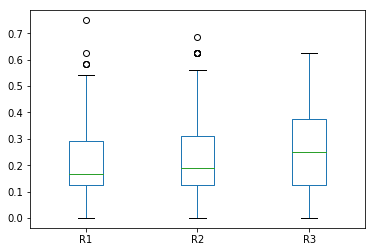

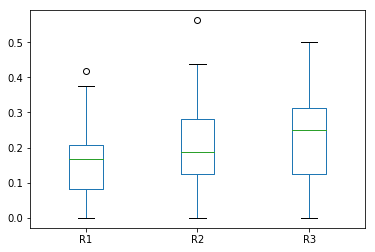

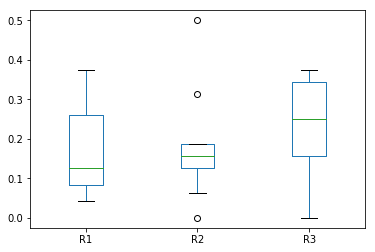

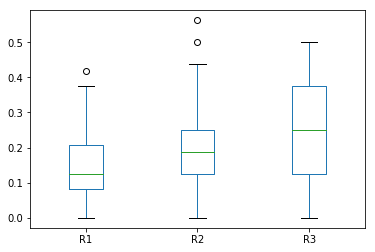

In [21]:
#Barcharts showing the R1, R2 and R3 metrics for academic, industrial and collaborative papers
academic.boxplot(column=['R1','R2', 'R3'],  grid=False)
plt.show()

collaboration.boxplot(column=['R1','R2', 'R3'],  grid=False)
plt.show()

industry.boxplot(column=['R1','R2', 'R3'],  grid=False)
plt.show()

joint.boxplot(column=['R1','R2', 'R3'],  grid=False)
plt.show()


In [22]:
# Generate data for tables and spider charts
from math import sqrt

#Population size for all the types of papers I want to compare
pop_all = len(experimental.index)
pop_ac = len(academic.index)
pop_col = len(collaboration.index)
pop_ind = len(industry.index)
pop_joint = len(joint.index)


print("Total number of papers: " +str(pop_all))
print("# of academic papers: " +str(pop_ac))
print("# of collaboration papers: " +str(pop_col))
print("# of industry papers: " +str(pop_ind))
print("# of collaboration and industry papers combined: " +str(pop_joint))

Total number of papers: 325
# of academic papers: 268
# of collaboration papers: 47
# of industry papers: 10
# of collaboration and industry papers combined: 57


In [23]:
##############
### METHOD ###
##############

method_index = ['problem_description', 'goal', 'research_method', 'research_question','pseudocode', 'hypothesis', 'prediction', 'experiment_setup']
types = ['all','academic','collaboration','industry', 'joint']
method_df=pd.DataFrame(index=types, columns=method_index)
method_err=pd.DataFrame(index=types, columns=method_index)

### ALLL ###
pd_all = experimental['problem_description'].mean()
pd_all_var = experimental['problem_description'].var()
pd_all_err = 1.96*(sqrt(pd_all_var)/sqrt(pop_all))

g_all = experimental['goal/objective'].mean()
g_all_var = experimental['goal/objective'].var()
g_all_err = 1.96*(sqrt(g_all_var)/sqrt(pop_all))

rm_all = experimental['research_method'].mean()
rm_all_var = experimental['research_method'].var()
rm_all_err = 1.96*(sqrt(rm_all_var)/sqrt(pop_all))

rq_all = experimental['research_question'].mean()
rq_all_var = experimental['research_question'].var()
rq_all_err = 1.96*(sqrt(rq_all_var)/sqrt(pop_all))

pc_all = experimental['pseudocode'].mean()
pc_all_var = experimental['pseudocode'].var()
pc_all_err = 1.96*(sqrt(pc_all_var)/sqrt(pop_all))

### new
hyp_all = experimental['hypothesis'].mean()
hyp_all_var = experimental['hypothesis'].var()
hyp_all_err = 1.96*(sqrt(hyp_all_var)/sqrt(pop_all))

pred_all = experimental['prediction'].mean()
pred_all_var = experimental['prediction'].var()
pred_all_err = 1.96*(sqrt(pred_all_var)/sqrt(pop_all))

es_all = experimental['experiment_setup'].mean()
es_all_var = experimental['experiment_setup'].var()
es_all_err = 1.96*(sqrt(es_all_var)/sqrt(pop_all))


### ACADEMIC ###
pd_ac = academic['problem_description'].mean()
pd_ac_var = academic['problem_description'].var()
pd_ac_err = 1.96*(sqrt(pd_ac_var)/sqrt(pop_ac))

g_ac = academic['goal/objective'].mean()
g_ac_var = academic['goal/objective'].var()
g_ac_err = 1.96*(sqrt(g_ac_var)/sqrt(pop_ac))

rm_ac = academic['research_method'].mean()
rm_ac_var = academic['research_method'].var()
rm_ac_err = 1.96*(sqrt(rm_ac_var)/sqrt(pop_ac))

rq_ac = academic['research_question'].mean()
rq_ac_var = academic['research_question'].var()
rq_ac_err = 1.96*(sqrt(rq_ac)/sqrt(pop_ac))

pc_ac = academic['pseudocode'].mean()
pc_ac_var = academic['pseudocode'].var()
pc_ac_err = 1.96*(sqrt(pc_ac_var)/sqrt(pop_ac))

### new
hyp_ac = academic['hypothesis'].mean()
hyp_ac_var = academic['hypothesis'].var()
hyp_ac_err = 1.96*(sqrt(hyp_ac_var)/sqrt(pop_ac))

pred_ac = academic['prediction'].mean()
pred_ac_var = academic['prediction'].var()
pred_ac_err = 1.96*(sqrt(pred_ac_var)/sqrt(pop_ac))

es_ac = academic['experiment_setup'].mean()
es_ac_var = academic['experiment_setup'].var()
es_ac_err = 1.96*(sqrt(es_ac_var)/sqrt(pop_ac))


### COLLABORATIONS ###
pd_col = collaboration['problem_description'].mean()
pd_col_var = collaboration['problem_description'].var()
pd_col_err = 1.96*(sqrt(pd_col_var)/sqrt(pop_col))

g_col = collaboration['goal/objective'].mean()
g_col_var = collaboration['goal/objective'].var()
g_col_err = 1.96*(sqrt(g_col_var)/sqrt(pop_col))

rm_col = collaboration['research_method'].mean()
rm_col_var = collaboration['research_method'].var()
rm_col_err = 1.96*(sqrt(rm_col_var)/sqrt(pop_col))

rq_col = collaboration['research_question'].mean()
rq_col_var = collaboration['research_question'].var()
rq_col_err = 1.96*(sqrt(rq_col_var)/sqrt(pop_col))

pc_col = collaboration['pseudocode'].mean()
pc_col_var = collaboration['pseudocode'].var()
pc_col_err = 1.96*(sqrt(pc_col_var)/sqrt(pop_col))

### new
hyp_col = collaboration['hypothesis'].mean()
hyp_col_var = collaboration['hypothesis'].var()
hyp_col_err = 1.96*(sqrt(hyp_col_var)/sqrt(pop_col))

pred_col = collaboration['prediction'].mean()
pred_col_var = collaboration['prediction'].var()
pred_col_err = 1.96*(sqrt(pred_col_var)/sqrt(pop_col))

es_col = collaboration['experiment_setup'].mean()
es_col_var = collaboration['experiment_setup'].var()
es_col_err = 1.96*(sqrt(es_col_var)/sqrt(pop_col))


### INDUSTRY ###
pd_ind = industry['problem_description'].mean()
pd_ind_var = industry['problem_description'].var()
pd_ind_err = 1.96*(sqrt(pd_ind_var)/sqrt(pop_ind))

g_ind = industry['goal/objective'].mean()
g_ind_var = industry['goal/objective'].var()
g_ind_err = 1.96*(sqrt(g_ind_var)/sqrt(pop_ind))

rm_ind = industry['research_method'].mean()
rm_ind_var = industry['research_method'].var()
rm_ind_err = 1.96*(sqrt(rm_ind_var)/sqrt(pop_ind))

rq_ind = industry['research_question'].mean()
rq_ind_var = industry['research_question'].var()
rq_ind_err = 1.96*(sqrt(rq_ind_var)/sqrt(pop_ind))

pc_ind = industry['pseudocode'].mean()
pc_ind_var = industry['pseudocode'].var()
pc_ind_err = 1.96*(sqrt(pc_ind_var)/sqrt(pop_ind))

hyp_ind = industry['hypothesis'].mean()
hyp_ind_var = industry['hypothesis'].var()
hyp_ind_err = 1.96*(sqrt(hyp_ind_var)/sqrt(pop_ind))

pred_ind = industry['prediction'].mean()
pred_ind_var = industry['prediction'].var()
pred_ind_err = 1.96*(sqrt(pred_ind_var)/sqrt(pop_ind))

es_ind = industry['experiment_setup'].mean()
es_ind_var = industry['experiment_setup'].var()
es_ind_err = 1.96*(sqrt(es_ind_var)/sqrt(pop_ind))

### JOINT ###
pd_joint = joint['problem_description'].mean()
pd_joint_var = joint['problem_description'].var()
pd_joint_err = 1.96*(sqrt(pd_joint_var)/sqrt(pop_joint))

g_joint = joint['goal/objective'].mean()
g_joint_var = joint['goal/objective'].var()
g_joint_err = 1.96*(sqrt(g_joint_var)/sqrt(pop_joint))

rm_joint = joint['research_method'].mean()
rm_joint_var = joint['research_method'].var()
rm_joint_err = 1.96*(sqrt(rm_joint_var)/sqrt(pop_joint))

rq_joint = joint['research_question'].mean()
rq_joint_var = joint['research_question'].var()
rq_joint_err = 1.96*(sqrt(rq_joint_var)/sqrt(pop_joint))

pc_joint = joint['pseudocode'].mean()
pc_joint_var = joint['pseudocode'].var()
pc_joint_err = 1.96*(sqrt(pc_joint_var)/sqrt(pop_joint))

hyp_joint = joint['hypothesis'].mean()
hyp_joint_var = joint['hypothesis'].var()
hyp_joint_err = 1.96*(sqrt(hyp_joint_var)/sqrt(pop_joint))

pred_joint = joint['prediction'].mean()
pred_joint_var = joint['prediction'].var()
pred_joint_err = 1.96*(sqrt(pred_joint_var)/sqrt(pop_joint))

es_joint = joint['experiment_setup'].mean()
es_joint_var = joint['experiment_setup'].var()
es_joint_err = 1.96*(sqrt(es_joint_var)/sqrt(pop_joint))


#'hypothesis', 'prediction', ,'experiment_setup'

#Generate tables
method_df.iloc[0] = dict(problem_description=pd_all, goal=g_all, research_method=rm_all, research_question=rq_all, pseudocode=pc_all, hypothesis=hyp_all, prediction=pred_all, experiment_setup=es_all)
method_df.iloc[1] = dict(problem_description=pd_ac, goal=g_ac, research_method=rm_ac, research_question=rq_ac, pseudocode=pc_ac, hypothesis=hyp_ac, prediction=pred_ac, experiment_setup=es_ac)
method_df.iloc[2] = dict(problem_description=pd_col, goal=g_col, research_method=rm_col, research_question=rq_col, pseudocode=pc_col, hypothesis=hyp_col, prediction=pred_col, experiment_setup=es_col)
method_df.iloc[3] = dict(problem_description=pd_ind, goal=g_ind, research_method=rm_ind, research_question=rq_ind, pseudocode=pc_ind, hypothesis=hyp_ind, prediction=pred_ind, experiment_setup=es_ind)
method_df.iloc[4] = dict(problem_description=pd_joint, goal=g_joint, research_method=rm_joint, research_question=rq_joint, pseudocode=pc_joint, hypothesis=hyp_joint, prediction=pred_joint, experiment_setup=es_joint)

method_err.iloc[0] = dict(problem_description=pd_all_err, goal=g_all_err, research_method=rm_all_err, research_question=rq_all_err, pseudocode=pc_all_err, hypothesis=hyp_all_err, prediction=pred_all_err, experiment_setup=es_all_err)
method_err.iloc[1] = dict(problem_description=pd_ac_err, goal=g_ac_err, research_method=rm_ac_err, research_question=rq_ac_err, pseudocode=pc_ac_err, hypothesis=hyp_ac_err, prediction=pred_ac_err, experiment_setup=es_ac_err)
method_err.iloc[2] = dict(problem_description=pd_col_err, goal=g_col_err, research_method=rm_col_err, research_question=rq_col_err, pseudocode=pc_col_err, hypothesis=hyp_col_err, prediction=pred_col_err, experiment_setup=es_col_err)
method_err.iloc[3] = dict(problem_description=pd_ind_err, goal=g_ind_err, research_method=rm_ind_err, research_question=rq_ind_err, pseudocode=pc_ind_err, hypothesis=hyp_ind_err, prediction=pred_ind_err, experiment_setup=es_ind_err)
method_err.iloc[4] = dict(problem_description=pd_joint_err, goal=g_joint_err, research_method=rm_joint_err, research_question=rq_joint_err, pseudocode=pc_joint_err, hypothesis=hyp_joint_err, prediction=pred_joint_err, experiment_setup=es_joint_err)

#Print tables

print('### METHOD ###')
print(method_df)
print('### METHOD ERROR ###')
print(method_err)

### METHOD ###
              problem_description      goal research_method research_question  \
all                      0.470769  0.221538       0.0153846         0.0553846   
academic                 0.470149  0.223881       0.0186567         0.0597015   
collaboration            0.446809  0.191489               0         0.0425532   
industry                      0.6       0.3               0                 0   
joint                    0.473684  0.210526               0         0.0350877   

              pseudocode hypothesis prediction experiment_setup  
all             0.544615  0.0492308  0.0123077         0.686154  
academic        0.570896  0.0597015  0.0149254          0.69403  
collaboration   0.468085          0          0         0.617021  
industry             0.2          0          0              0.8  
joint           0.421053          0          0         0.649123  
### METHOD ERROR ###
              problem_description       goal research_method  \
all              

In [24]:
############
### DATA ###
############

data_index = ['results', 'train', 'validation', 'test']
data_df = pd.DataFrame(index=types, columns=data_index)
data_err = pd.DataFrame(index=types, columns=data_index)

### ALL ###
res_all = experimental['results'].mean()
res_all_var = experimental['results'].var()
res_all_err = 1.96*(sqrt(res_all_var)/sqrt(pop_all))

train_all = experimental['train'].mean()
train_all_var = experimental['train'].var()
train_all_err = 1.96*(sqrt(train_all_var)/sqrt(pop_all))

val_all = experimental['validation'].mean()
val_all_var = experimental['validation'].var()
val_all_err = 1.96*(sqrt(val_all_var)/sqrt(pop_all))

test_all = experimental['test'].mean()
test_all_var = experimental['test'].var()
test_all_err = 1.96*(sqrt(test_all_var)/sqrt(pop_all))

### ACADEMIC ###
res_ac = academic['results'].mean()
res_ac_var = academic['results'].var()
res_ac_err = 1.96*(sqrt(res_ac_var)/sqrt(pop_ac))

train_ac = academic['train'].mean()
train_ac_var = academic['train'].var()
train_ac_err = 1.96*(sqrt(train_ac_var)/sqrt(pop_ac))

val_ac = academic['validation'].mean()
val_ac_var = academic['validation'].var()
val_ac_err = 1.96*(sqrt(val_ac_var)/sqrt(pop_ac))

test_ac = academic['test'].mean()
test_ac_var = academic['test'].var()
test_ac_err = 1.96*(sqrt(test_ac_var)/sqrt(pop_ac))

### COLLABORATIONS ###
res_col = collaboration['results'].mean()
res_col_var = collaboration['results'].var()
res_col_err = 1.96*(sqrt(res_col_var)/sqrt(pop_col))

train_col = collaboration['train'].mean()
train_col_var = collaboration['train'].var()
train_col_err = 1.96*(sqrt(train_col_var)/sqrt(pop_col))

val_col = collaboration['validation'].mean()
val_col_var = collaboration['validation'].var()
val_col_err = 1.96*(sqrt(val_col_var)/sqrt(pop_col))

test_col = collaboration['test'].mean()
test_col_var = collaboration['test'].var()
test_col_err = 1.96*(sqrt(test_col_var)/sqrt(pop_col))

### INDUSTRY ###
res_ind = industry['results'].mean()
res_ind_var = industry['results'].var()
res_ind_err = 1.96*(sqrt(res_ind_var)/sqrt(pop_ind))

train_ind = industry['train'].mean()
train_ind_var = industry['train'].var()
train_ind_err = 1.96*(sqrt(train_ind_var)/sqrt(pop_ind))

val_ind = industry['validation'].mean()
val_ind_var = industry['validation'].var()
val_ind_err = 1.96*(sqrt(val_ind_var)/sqrt(pop_ind))

test_ind = industry['test'].mean()
test_ind_var = industry['test'].var()
test_ind_err = 1.96*(sqrt(test_ind_var)/sqrt(pop_ind))


### JOINT ###
res_joint = joint['results'].mean()
res_joint_var = joint['results'].var()
res_joint_err = 1.96*(sqrt(res_joint_var)/sqrt(pop_joint))

train_joint = joint['train'].mean()
train_joint_var = joint['train'].var()
train_joint_err = 1.96*(sqrt(train_joint_var)/sqrt(pop_joint))

val_joint = joint['validation'].mean()
val_joint_var = joint['validation'].var()
val_joint_err = 1.96*(sqrt(val_joint_var)/sqrt(pop_joint))

test_joint = joint['test'].mean()
test_joint_var = joint['test'].var()
test_joint_err = 1.96*(sqrt(test_joint_var)/sqrt(pop_joint))

# Generate tables
data_df.iloc[0] = dict(results=res_all, train=train_all, validation=val_all, test=test_all)
data_df.iloc[1] = dict(results=res_ac, train=train_ac, validation=val_ac, test=test_ac)
data_df.iloc[2] = dict(results=res_col, train=train_col, validation=val_col, test=test_col)
data_df.iloc[3] = dict(results=res_ind, train=train_ind, validation=val_ind, test=test_ind)
data_df.iloc[4] = dict(results=res_joint, train=train_joint, validation=val_joint, test=test_joint)

data_err.iloc[0] = dict(results=res_all_err, train=train_all_err, validation=val_all_err, test=test_all_err)
data_err.iloc[1] = dict(results=res_ac_err, train=train_ac_err, validation=val_ac_err, test=test_ac_err)
data_err.iloc[2] = dict(results=res_col_err, train=train_col_err, validation=val_col_err, test=test_col_err)
data_err.iloc[3] = dict(results=res_ind_err, train=train_ind_err, validation=val_ind_err, test=test_ind_err)
data_err.iloc[4] = dict(results=res_joint_err, train=train_joint_err, validation=val_joint_err, test=test_joint_err)

# Print tables
print('### DATA ###')
print(data_df)

# Print tables
print('### DATA ERROR ###')
print(data_err)


### DATA ###
                 results     train validation      test
all            0.0369231  0.562162   0.164835  0.298462
academic       0.0410448  0.612676   0.184397   0.30597
collaboration          0  0.441176   0.121212  0.276596
industry             0.1  0.222222          0       0.2
joint          0.0175439  0.395349   0.097561  0.263158
### DATA ERROR ###
                 results      train validation       test
all            0.0205335  0.0540852  0.0404503  0.0498257
academic       0.0237973  0.0585296  0.0465962   0.055275
collaboration          0    0.14409  0.0947554   0.129268
industry           0.196   0.273309          0   0.261333
joint           0.034386   0.128431   0.077988   0.115334


In [25]:
##################
### EXPERIMENT ###
##################

experiment_index = ['open_source_code', 'open_experiment_code', 'hardware_specification', 'software_dependencies']
experiment_df = pd.DataFrame(index=types, columns=experiment_index)
experiment_err = pd.DataFrame(index=types, columns=experiment_index)

### ALL ###
osc_all = experimental['open_source_code'].mean()
osc_all_var = experimental['open_source_code'].var()
osc_all_err = 1.96*(sqrt(osc_all_var)/sqrt(pop_all))

oec_all = experimental['open_experiment_code'].mean()
oec_all_var = experimental['open_experiment_code'].var()
oec_all_err = 1.96*(sqrt(oec_all_var)/sqrt(pop_all))

har_all = experimental['hardware_specification'].mean()
har_all_var = experimental['hardware_specification'].var()
har_all_err = 1.96*(sqrt(har_all_var)/sqrt(pop_all))

sof_all = experimental['software_dependencies'].mean()
sof_all_var = experimental['software_dependencies'].var()
sof_all_err = 1.96*(sqrt(sof_all_var)/sqrt(pop_all))

### ACADEMIC ###
osc_ac = academic['open_source_code'].mean()
osc_ac_var = academic['open_source_code'].var()
osc_ac_err = 1.96*(sqrt(osc_ac_var)/sqrt(pop_ac))

oec_ac = academic['open_experiment_code'].mean()
oec_ac_var = academic['open_experiment_code'].var()
oec_ac_err = 1.96*(sqrt(oec_ac_var)/sqrt(pop_ac))

har_ac = academic['hardware_specification'].mean()
har_ac_var = academic['hardware_specification'].var()
har_ac_err = 1.96*(sqrt(har_ac_var)/sqrt(pop_ac))

sof_ac = academic['software_dependencies'].mean()
sof_ac_var = academic['software_dependencies'].var()
sof_ac_err = 1.96*(sqrt(sof_ac_var)/sqrt(pop_ac))

### COLLABORATIONS ###
osc_col = collaboration['open_source_code'].mean()
osc_col_var = collaboration['open_source_code'].var()
osc_col_err = 1.96*(sqrt(osc_col_var)/sqrt(pop_col))

oec_col = collaboration['open_experiment_code'].mean()
oec_col_var = collaboration['open_experiment_code'].var()
oec_col_err = 1.96*(sqrt(oec_col_var)/sqrt(pop_col))

har_col = collaboration['hardware_specification'].mean()
har_col_var = collaboration['hardware_specification'].var()
har_col_err = 1.96*(sqrt(har_col_var)/sqrt(pop_col))

sof_col = collaboration['software_dependencies'].mean()
sof_col_var = collaboration['software_dependencies'].var()
sof_col_err = 1.96*(sqrt(sof_col_var)/sqrt(pop_col))

### INDUSTRY ###
osc_ind = industry['open_source_code'].mean()
osc_ind_var = industry['open_source_code'].var()
osc_ind_err = 1.96*(sqrt(osc_ind_var)/sqrt(pop_ind))

oec_ind = industry['open_experiment_code'].mean()
oec_ind_var = industry['open_experiment_code'].var()
oec_ind_err = 1.96*(sqrt(oec_ind_var)/sqrt(pop_ind))

har_ind = industry['hardware_specification'].mean()
har_ind_var = industry['hardware_specification'].var()
har_ind_err = 1.96*(sqrt(har_ind_var)/sqrt(pop_ind))

sof_ind = industry['software_dependencies'].mean()
sof_ind_var = industry['software_dependencies'].var()
sof_ind_err = 1.96*(sqrt(sof_ind_var)/sqrt(pop_ind))

### JOINT ###
osc_joint = joint['open_source_code'].mean()
osc_joint_var = joint['open_source_code'].var()
osc_joint_err = 1.96*(sqrt(osc_joint_var)/sqrt(pop_joint))

oec_joint = joint['open_experiment_code'].mean()
oec_joint_var = joint['open_experiment_code'].var()
oec_joint_err = 1.96*(sqrt(oec_joint_var)/sqrt(pop_joint))

har_joint = joint['hardware_specification'].mean()
har_joint_var = joint['hardware_specification'].var()
har_joint_err = 1.96*(sqrt(har_joint_var)/sqrt(pop_joint))

sof_joint = joint['software_dependencies'].mean()
sof_joint_var = joint['software_dependencies'].var()
sof_joint_err = 1.96*(sqrt(sof_joint_var)/sqrt(pop_joint))


# Generating tables
experiment_df.iloc[0] = dict(open_source_code=osc_all, open_experiment_code=oec_all, hardware_specification=har_all, software_dependencies=sof_all)
experiment_df.iloc[1] = dict(open_source_code=osc_ac, open_experiment_code=oec_ac, hardware_specification=har_ac, software_dependencies=sof_ac)
experiment_df.iloc[2] = dict(open_source_code=osc_col, open_experiment_code=oec_col, hardware_specification=har_col, software_dependencies=sof_col)
experiment_df.iloc[3] = dict(open_source_code=osc_ind, open_experiment_code=oec_ind, hardware_specification=har_ind, software_dependencies=sof_ind)
experiment_df.iloc[4] = dict(open_source_code=osc_joint, open_experiment_code=oec_joint, hardware_specification=har_joint, software_dependencies=sof_joint)

experiment_err.iloc[0] = dict(open_source_code=osc_all_err, open_experiment_code=oec_all_err, hardware_specification=har_all_err, software_dependencies=sof_all_err)
experiment_err.iloc[1] = dict(open_source_code=osc_ac_err, open_experiment_code=oec_ac_err, hardware_specification=har_ac_err, software_dependencies=sof_ac_err)
experiment_err.iloc[2] = dict(open_source_code=osc_col_err, open_experiment_code=oec_col_err, hardware_specification=har_col_err, software_dependencies=sof_col_err)
experiment_err.iloc[3] = dict(open_source_code=osc_ind_err, open_experiment_code=oec_ind_err, hardware_specification=har_ind_err, software_dependencies=sof_ind_err)
experiment_err.iloc[4] = dict(open_source_code=osc_joint_err, open_experiment_code=oec_joint_err, hardware_specification=har_joint_err, software_dependencies=sof_joint_err)

print('### EXPERIMENT ###')
print(experiment_df)

print('### EXPERIMENT ERROR ###')
print(experiment_err)
#print(experiment_df.iloc[0].values)

### EXPERIMENT ###
              open_source_code open_experiment_code hardware_specification  \
all                       0.08            0.0553846               0.273846   
academic             0.0858209            0.0559701               0.302239   
collaboration        0.0425532            0.0425532                0.12766   
industry                   0.1                  0.1                    0.2   
joint                0.0526316            0.0526316               0.140351   

              software_dependencies  
all                            0.16  
academic                   0.179104  
collaboration             0.0425532  
industry                        0.2  
joint                     0.0701754  
### EXPERIMENT ERROR ###
              open_source_code open_experiment_code hardware_specification  \
all                  0.0295408            0.0249061              0.0485569   
academic             0.0335979            0.0275722              0.0550844   
collaboration        0.05

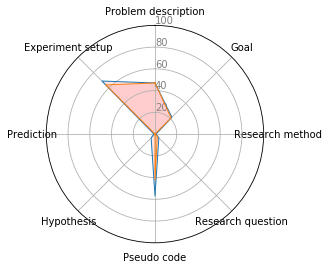

In [26]:
### METHOD ###
#Radar Chart with many individuals - 

# Libraries
from math import pi
 
# Set data
df = method_df

 
# ------- PART 1: Create background
 
# number of variable
categories= method_index = ['Problem description', 'Goal', 'Research method', 'Research question','Pseudo code', 'Hypothesis', 'Prediction', 'Experiment setup']#method_index#list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60, 80,100], ["20","40","60", "80", "100"], color="grey", size=10)
#plt.yticks([20,40,60], ["20","40","60"], color="grey", size=7)
plt.ylim(0,100)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# All
#values=df.iloc[0].values
#values=values*100
#values = values.astype(int).flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="All")
#ax.fill(angles, values, 'b', alpha=0.1)

# Academic
#values=df.loc[1].drop('group').values.flatten().tolist()
values=df.iloc[1].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Academic")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Collaboration - do not draw
values=df.iloc[2].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="Collaboration")
#ax.fill(angles, values, 'r', alpha=0.1)    
    
# Industry - do not draw
values=df.iloc[3].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="Industry")
#ax.fill(angles, values, 'r', alpha=0.1)    

# JOINT
values=df.iloc[4].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="C+I")
ax.fill(angles, values, 'r', alpha=0.1)   

    
# Add legend
#plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.15))

# Add title
#plt.suptitle('METHOD', fontsize=12, x=0.52, y=0.07)

#Save fig to pdf
plt.savefig('spider_method.pdf', format='pdf', bbox_inches='tight',transparent=True)

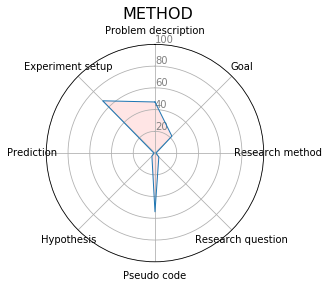

In [27]:
### METHOD: ALL ###

# Libraries
from math import pi
 
# Set data
df = method_df

 
# ------- PART 1: Create background
 
# number of variable
categories= method_index = ['Problem description', 'Goal', 'Research method', 'Research question','Pseudo code', 'Hypothesis', 'Prediction', 'Experiment setup']#method_index#list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60, 80,100], ["20","40","60", "80", "100"], color="grey", size=10)
plt.ylim(0,100)
 
# ------- PART 2: Add plot

# All
#values=df.loc[1].drop('group').values.flatten().tolist()
values=df.iloc[0].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="All")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
#plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.15))

# Add title
plt.suptitle('METHOD', fontsize=16, x=0.52, y=1.01)

#Save fig to pdf
plt.savefig('radar_chart-method-all.pdf', format='pdf', bbox_inches='tight',transparent=True)

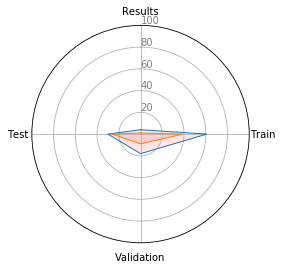

In [28]:
### DATA ###
#Radar Chart with many individuals - 

# Libraries
from math import pi
 
# Set data
df = data_df

 
# ------- PART 1: Create background
 
# number of variable
categories = ['Results', 'Train', 'Validation', 'Test'] #data_index#list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60, 80,100], ["20","40","60", "80", "100"], color="grey", size=10)
#plt.yticks([20,40,60], ["20","40","60"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# All
#values=df.iloc[0].values
#values=values*100
#values = values.astype(int).flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="All")
#ax.fill(angles, values, 'b', alpha=0.1)

# ACADEMIC
#values=df.loc[1].drop('group').values.flatten().tolist()
values=df.iloc[1].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Academic")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Collaboration - do not draw
values=df.iloc[2].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="Collaboration")
#ax.fill(angles, values, 'r', alpha=0.1)    
    

# Industry - do not draw
values=df.iloc[3].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="Industry")
#ax.fill(angles, values, 'r', alpha=0.1)    

#JOINT
values=df.iloc[4].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Industry")
ax.fill(angles, values, 'r', alpha=0.1)  


# Add title
#plt.suptitle('DATA', fontsize=11)

# Add legend
#plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.15))
plt.savefig('spider_data.pdf', format='pdf', bbox_inches='tight',transparent=True)

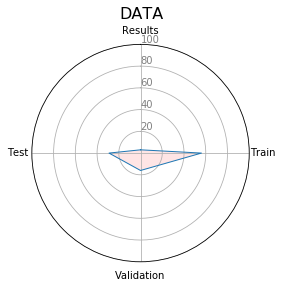

In [29]:
### DATA - ALL ###


# Libraries
from math import pi
 
# Set data
df = data_df

 
# ------- PART 1: Create background
 
# number of variable
categories = ['Results', 'Train', 'Validation', 'Test'] #data_index#list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60, 80,100], ["20","40","60", "80", "100"], color="grey", size=10)
#plt.yticks([20,40,60], ["20","40","60"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# All
values=df.iloc[0].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="All")
ax.fill(angles, values, 'r', alpha=0.1)

# Add title
plt.suptitle('DATA', fontsize=16, x=0.515, y=1.01)

#Save fig to pdf
plt.savefig('radar_chart-data-all.pdf', format='pdf', bbox_inches='tight',transparent=True)


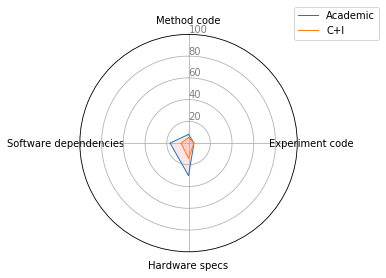

In [30]:
### EXPERIMENT ###
#Radar Chart with many individuals - 

# Libraries
from math import pi
 
# Set data
df = experiment_df

 
# ------- PART 1: Create background
 
# number of variable
categories = ['Method code', 'Experiment code', 'Hardware specs', 'Software dependencies'] 
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60, 80,100], ["20","40","60", "80", "100"], color="grey", size=10)
#plt.yticks([20,40,60], ["20","40","60"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# All
#values=df.iloc[0].values
#values=values*100
#values = values.astype(int).flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="All")
#ax.fill(angles, values, 'b', alpha=0.1)

# ACADEMIC
#values=df.loc[1].drop('group').values.flatten().tolist()
values=df.iloc[1].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Academic")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Collaboration - do not draw
values=df.iloc[2].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="Collaboration")
#ax.fill(angles, values, 'r', alpha=0.1)    
    

# Industry - do not draw
values=df.iloc[3].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="Industry")
#ax.fill(angles, values, 'r', alpha=0.1)    

# JOINT
values=df.iloc[4].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="C+I")
ax.fill(angles, values, 'r', alpha=0.1)    


## Add title
#plt.suptitle('EXPERIMENT', fontsize=11)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.15))

plt.savefig('spider_experiment.pdf', format='pdf', bbox_inches='tight',transparent=True)

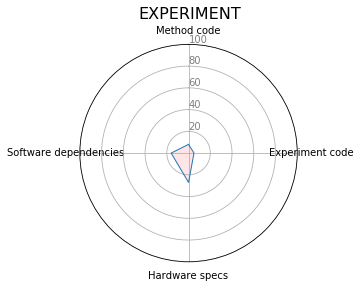

In [31]:
### EXPERIMENT - ALL ###
#Radar Chart with many individuals - 

# Libraries
from math import pi
 
# Set data
df = experiment_df

 
# ------- PART 1: Create background
 
# number of variable
categories = ['Method code', 'Experiment code', 'Hardware specs', 'Software dependencies'] 
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60, 80,100], ["20","40","60", "80", "100"], color="grey", size=10)
#plt.yticks([20,40,60], ["20","40","60"], color="grey", size=7)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# All
#values=df.iloc[0].values
#values=values*100
#values = values.astype(int).flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="All")
#ax.fill(angles, values, 'b', alpha=0.1)

# Academic
#values=df.loc[1].drop('group').values.flatten().tolist()
values=df.iloc[0].values
values=values*100
values = values.astype(int).flatten().tolist()

#values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="All")
ax.fill(angles, values, 'r', alpha=0.1)
    
# Add title
plt.suptitle('EXPERIMENT', fontsize=16, x=0.515, y=1.01)


#Save fig to pdf
plt.savefig('radar_chart-experiment-all.pdf', format='pdf', bbox_inches='tight',transparent=True)

In [32]:
# Generate data for tables and spider charts
from math import sqrt

#Population size for all the types of papers I want to compare
#pop_all = len(experimental.index)
#pop_ac = len(academic.index)
#pop_col = len(collaboration.index)
#pop_ind = len(industry.index)

##############
### METHOD ###
##############

method_index = ['problem_description', 'goal/objective', 'research_method', 'research_question','pseudocode', 'hypothesis', 'prediction', 'experiment_setup']
types = ['all','academic','collaboration','industry']

def error95pct(variance, population):
    return 1.96*(sqrt(variance)/sqrt(population))

def mean_error(df_in, df_variables, population):
    d = {}
    e = {}
    for i in df_variables:
        #print (i)
        mean_i = round(df_in[i].mean(),2)
        var_i = df_in[i].var()
        err_i = round(error95pct(var_i, population),2)
            
        d[i] = mean_i
        e[i]=err_i
    
    return d,e

################
#### METHOD ####
################
df_mean = pd.DataFrame(index=types, columns=method_index)
df_err = pd.DataFrame(index=types, columns=method_index)

#All
m, e = mean_error(experimental, method_index, pop_all)
df_mean.iloc[0] = m
df_err.iloc[0] = e

#Academic
m, e = mean_error(academic, method_index, pop_ac)
df_mean.iloc[1] = m
df_err.iloc[1] = e

#Collaboration
m, e = mean_error(collaboration, method_index, pop_col)
df_mean.iloc[2] = m
df_err.iloc[2] = e

#Industry
m, e = mean_error(industry, method_index, pop_ind)
df_mean.iloc[3] = m
df_err.iloc[3] = e

print('#### METHOD ####')
print("-- MEAN")
print(df_mean)
print("-- ERROR")
print(df_err)

df_mean.to_csv('method_mean.csv')
df_err.to_csv('method_err.csv')

##############
#### DATA ####
##############
df_mean = pd.DataFrame(index=types, columns=data_index)
df_err = pd.DataFrame(index=types, columns=data_index)

#All
m, e = mean_error(experimental, data_index, pop_all)
df_mean.iloc[0] = m
df_err.iloc[0] = e

#Academic
m, e = mean_error(academic, data_index, pop_ac)
df_mean.iloc[1] = m
df_err.iloc[1] = e

#Collaboration
m, e = mean_error(collaboration, data_index, pop_col)
df_mean.iloc[2] = m
df_err.iloc[2] = e

#Industry
m, e = mean_error(industry, data_index, pop_ind)
df_mean.iloc[3] = m
df_err.iloc[3] = e

print('#### DATA ####')
print("-- MEAN")
print(df_mean)
print("-- ERROR")
print(df_err)

df_mean.to_csv('data_mean.csv')
df_err.to_csv('data_err.csv')

#####################
##### EXPERIMENT ####
#####################

df_mean = pd.DataFrame(index=types, columns=experiment_index)
df_err = pd.DataFrame(index=types, columns=experiment_index)

print(experiment_index)

#All
m, e = mean_error(experimental, experiment_index, pop_all)
df_mean.iloc[0] = m
df_err.iloc[0] = e

#Academic
m, e = mean_error(academic, experiment_index, pop_ac)
df_mean.iloc[1] = m
df_err.iloc[1] = e

#Collaboration
m, e = mean_error(collaboration, experiment_index, pop_col)
df_mean.iloc[2] = m
df_err.iloc[2] = e

#Industry
m, e = mean_error(industry, experiment_index, pop_ind)
df_mean.iloc[3] = m
df_err.iloc[3] = e

print('#### EXPERIMENT ####')
print("-- MEAN")
print(df_mean)
print("--ERROR")
print(df_err)

df_mean.to_csv('experiment_mean.csv')
df_err.to_csv('experiment_err.csv')




#### METHOD ####
-- MEAN
              problem_description goal/objective research_method  \
all                          0.47           0.22            0.02   
academic                     0.47           0.22            0.02   
collaboration                0.45           0.19               0   
industry                      0.6            0.3               0   

              research_question pseudocode hypothesis prediction  \
all                        0.06       0.54       0.05       0.01   
academic                   0.06       0.57       0.06       0.01   
collaboration              0.04       0.47          0          0   
industry                      0        0.2          0          0   

              experiment_setup  
all                       0.69  
academic                  0.69  
collaboration             0.62  
industry                   0.8  
-- ERROR
              problem_description goal/objective research_method  \
all                          0.05           0.05   

In [33]:
#industry['affiliation']#.to_csv('companies.csv')
academic['link'].to_csv('academic.csv')


           Paper Count
Company               
Microsoft           14
IBM                 14
Baidu                3
Didi                 1
Facebook             1
Others              26


Index(['Microsoft', 'IBM', 'Baidu', 'Didi', 'Facebook', 'Others'], dtype='object', name='Company')

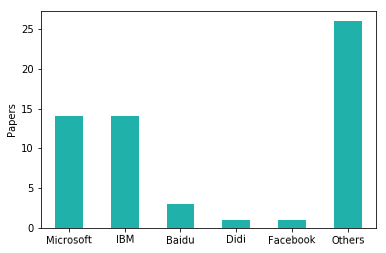

In [34]:
columns = ['Company', 'Number of papers']
data = [['Microsoft',14], ['IBM',14], ['Baidu',3], ['Didi',1],['Facebook', 1], ['Others', 26]]

#tgdf = pd.DataFrame(data, columns=columns)

tgdf = pd.DataFrame({'Company': ['Microsoft', 'IBM', 'Baidu', 'Didi', 'Facebook', 'Others'],
                    'Paper Count':[14,14,3,1,1, 26],})
tgdf = tgdf.set_index('Company')

ax = tgdf.plot(kind='bar', rot=1, legend =False, color='lightseagreen')#, title='Paper Count for Tech giants ')
ax.set_xlabel('')
ax.set_ylabel('Papers')

plt.savefig('companies_paper_count.pdf', transparent=True)

print(tgdf)
tgdf.index


In [35]:
# Reproducibility scores, save to Latex table

d['R1'] = (d['Method']+d['Data']+d['Experiment']+d['Source code'])/4
d['R2'] = (d['Method']+d['Data'])/2
d['R3'] = (d['Method'])

r = d.loc[:,['R1','R2', 'R3']]
r = r.round(2)

tbl = r.to_latex()
#table
file = open('platforms_metrics.txt', 'w') 
file.write(tbl)
file.close()


TypeError: list indices must be integers or slices, not str

NameError: name 'r' is not defined

<Figure size 576x576 with 0 Axes>